In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%cd "/Users/yy/downloads"

/Users/yy/Downloads


In [5]:
import sqlite3

path = 'chinook.db'
connection = sqlite3.connect(path)

In [6]:
type(connection)

sqlite3.Connection

# Sales data analysis

In [7]:
cursor = connection.cursor()

In [8]:
cursor.execute('''select employees.FirstName, employees.LastName, employees.EmployeeId, employees.HireDate, 
COUNT(invoices.InvoiceId) as "Number of Sales", SUM(invoices.Total) as "Total Sales Amount" from employees
join customers on employees.EmployeeId = customers.SupportRepId
join invoices on customers.CustomerId = invoices.CustomerId
group by EmployeeId;''')
result1 = cursor.fetchall()
result1[:]

[('Jane', 'Peacock', 3, '2002-04-01 00:00:00', 146, 833.0400000000013),
 ('Margaret', 'Park', 4, '2003-05-03 00:00:00', 140, 775.4000000000011),
 ('Steve', 'Johnson', 5, '2003-10-17 00:00:00', 126, 720.160000000001)]

In [9]:
table1 = pd.DataFrame(
data = result1,
columns = ['FirstName', 'LastName', 'EmployeeId', 'HireDate', 'NumberOfSales', 'TotalSalesAmount'])
table1

,FirstName,LastName,EmployeeId,HireDate,NumberOfSales,TotalSalesAmount
0,Jane,Peacock,3,2002-04-01 00:00:00,146,833.04
1,Margaret,Park,4,2003-05-03 00:00:00,140,775.40
2,Steve,Johnson,5,2003-10-17 00:00:00,126,720.16


# Diff visualization

In [10]:
import datetime as dt

In [11]:
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM invoices
                               ''', connection)

In [12]:
df = pd.DataFrame(sql_query, columns = ['InvoiceId', 'CustomerId', 'InvoiceDate'])
print (df)

     InvoiceId  CustomerId          InvoiceDate
0            1           2  2009-01-01 00:00:00
1            2           4  2009-01-02 00:00:00
2            3           8  2009-01-03 00:00:00
3            4          14  2009-01-06 00:00:00
4            5          23  2009-01-11 00:00:00
..         ...         ...                  ...
407        408          25  2013-12-05 00:00:00
408        409          29  2013-12-06 00:00:00
409        410          35  2013-12-09 00:00:00
410        411          44  2013-12-14 00:00:00
411        412          58  2013-12-22 00:00:00

[412 rows x 3 columns]


In [13]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [14]:
df['time_diff'] = 0

In [15]:
for i in range(df.shape[0]-1):
    df["time_diff"][i+1] = df["InvoiceDate"][i+1] - df["InvoiceDate"][i]
df    

/var/folders/3g/bldv32qx55b58w_w7nr6bynw0000gn/T/ipykernel_58857/618926593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_diff"][i+1] = df["InvoiceDate"][i+1] - df["InvoiceDate"][i]


,InvoiceId,CustomerId,InvoiceDate,time_diff
0,1,2,2009-01-01,0
1,2,4,2009-01-02,1 days 00:00:00
2,3,8,2009-01-03,1 days 00:00:00
3,4,14,2009-01-06,3 days 00:00:00
4,5,23,2009-01-11,5 days 00:00:00
...,...,...,...,...
407,408,25,2013-12-05,1 days 00:00:00
408,409,29,2013-12-06,1 days 00:00:00
409,410,35,2013-12-09,3 days 00:00:00
410,411,44,2013-12-14,5 days 00:00:00


In [16]:
df1=df.sort_values(by="CustomerId",ascending=True,kind="mergesort")
df1

,InvoiceId,CustomerId,InvoiceDate,time_diff
97,98,1,2010-03-11,13 days 00:00:00
120,121,1,2010-06-13,1 days 00:00:00
142,143,1,2010-09-15,1 days 00:00:00
194,195,1,2011-05-06,8 days 00:00:00
315,316,1,2012-10-27,0 days 00:00:00
...,...,...,...,...
44,45,59,2009-07-08,1 days 00:00:00
96,97,59,2010-02-26,8 days 00:00:00
217,218,59,2011-08-20,0 days 00:00:00
228,229,59,2011-09-30,5 days 00:00:00


In [17]:
df4 = df["time_diff"].astype(str).str[0:2]

In [18]:
df4 = df4.astype(int)

In [19]:
df5 = pd.DataFrame(df4)

In [20]:
df5

,time_diff
0,0
1,1
2,1
3,3
4,5
...,...
407,1
408,1
409,3
410,5


<AxesSubplot:xlabel='time_diff', ylabel='count'>

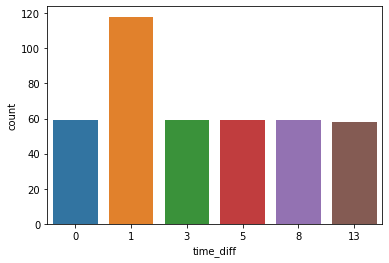

In [21]:
import seaborn as sns
sns.countplot(data = df5, x = "time_diff")

# Metrics analysis

In [22]:
cursor.execute('''SELECT i.billingcountry, ROUND(SUM(total),2) AS 'TotalSales'
from invoices as i
GROUP BY billingcountry
ORDER BY totalsales DESC;
''')
result3_1 = cursor.fetchall()
result3_1[:]

[('USA', 523.06),
 ('Canada', 303.96),
 ('France', 195.1),
 ('Brazil', 190.1),
 ('Germany', 156.48),
 ('United Kingdom', 112.86),
 ('Czech Republic', 90.24),
 ('Portugal', 77.24),
 ('India', 75.26),
 ('Chile', 46.62),
 ('Ireland', 45.62),
 ('Hungary', 45.62),
 ('Austria', 42.62),
 ('Finland', 41.62),
 ('Netherlands', 40.62),
 ('Norway', 39.62),
 ('Sweden', 38.62),
 ('Spain', 37.62),
 ('Poland', 37.62),
 ('Italy', 37.62),
 ('Denmark', 37.62),
 ('Belgium', 37.62),
 ('Australia', 37.62),
 ('Argentina', 37.62)]

In [23]:
table3_1 = pd.DataFrame(
data = result3_1,
columns = ['BillingCountry', 'TotalSales'])
table3_1

,BillingCountry,TotalSales
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


In [24]:
cursor.execute('''SELECT g.name GENRE,
       ROUND(SUM(ii.unitprice),2) SPENT
FROM customers c
JOIN invoices i ON i.customerid = c.customerid 
JOIN invoice_items ii ON ii.invoiceid = i.invoiceid
JOIN tracks t ON t.trackid = ii.trackid
JOIN genres g ON g.genreid = t.genreid
GROUP BY 1
ORDER BY 2 DESC;
''')
result3_2 = cursor.fetchall()
result3_2[:]

[('Rock', 826.65),
 ('Latin', 382.14),
 ('Metal', 261.36),
 ('Alternative & Punk', 241.56),
 ('TV Shows', 93.53),
 ('Jazz', 79.2),
 ('Blues', 60.39),
 ('Drama', 57.71),
 ('R&B/Soul', 40.59),
 ('Classical', 40.59),
 ('Sci Fi & Fantasy', 39.8),
 ('Reggae', 29.7),
 ('Pop', 27.72),
 ('Soundtrack', 19.8),
 ('Comedy', 17.91),
 ('Hip Hop/Rap', 16.83),
 ('Bossa Nova', 14.85),
 ('Alternative', 13.86),
 ('World', 12.87),
 ('Science Fiction', 11.94),
 ('Heavy Metal', 11.88),
 ('Electronica/Dance', 11.88),
 ('Easy Listening', 9.9),
 ('Rock And Roll', 5.94)]

In [25]:
table3_2 = pd.DataFrame(
data = result3_2,
columns = ['Genre', 'Spent'])
table3_2

,Genre,Spent
0,Rock,826.65
1,Latin,382.14
2,Metal,261.36
3,Alternative & Punk,241.56
4,TV Shows,93.53
5,Jazz,79.20
6,Blues,60.39
7,Drama,57.71
8,R&B/Soul,40.59
9,Classical,40.59


In [26]:
cursor.execute('''WITH c AS
(SELECT Invoices.CustomerId AS id_cst, 
        Invoices.BillingCountry AS Country, 
        SUM(Invoices.Total) AS sum 
 FROM Invoices
 JOIN Customers ON Invoices.BillingCountry = Customers.Country AND Invoices.CustomerId = Customers.CustomerId
 GROUP BY 1,2
 ORDER BY 2 )

SELECT Customers.CustomerId, Customers.FirstName, Customers.LastName, b.country, b.max_sum 
FROM Customers,
     (SELECT a.country AS country, max(a.sum) AS max_sum 
      FROM (SELECT Invoices.CustomerId AS id_cst, Invoices.BillingCountry AS Country, SUM(Invoices.Total) AS sum 
            FROM Invoices JOIN customers ON Invoices.BillingCountry = Customers.Country AND Invoices.CustomerId = Customers.CustomerId
            GROUP BY id_cst, Country
            ORDER BY Country ) AS a
      GROUP BY Country
      ORDER BY max_sum) AS b
      JOIN c
      ON c.country = b.country AND c.sum = b.max_sum
WHERE Customers.CustomerId = c.id_cst
ORDER BY max_sum DESC;
''')
result3_3 = cursor.fetchall()
result3_3[:]

[(6, 'Helena', 'Holý', 'Czech Republic', 49.620000000000005),
 (26, 'Richard', 'Cunningham', 'USA', 47.620000000000005),
 (57, 'Luis', 'Rojas', 'Chile', 46.62),
 (45, 'Ladislav', 'Kovács', 'Hungary', 45.62),
 (46, 'Hugh', "O'Reilly", 'Ireland', 45.62),
 (37, 'Fynn', 'Zimmermann', 'Germany', 43.62),
 (7, 'Astrid', 'Gruber', 'Austria', 42.62),
 (44, 'Terhi', 'Hämäläinen', 'Finland', 41.620000000000005),
 (43, 'Isabelle', 'Mercier', 'France', 40.620000000000005),
 (48, 'Johannes', 'Van der Berg', 'Netherlands', 40.62),
 (34, 'João', 'Fernandes', 'Portugal', 39.620000000000005),
 (1, 'Luís', 'Gonçalves', 'Brazil', 39.62),
 (3, 'François', 'Tremblay', 'Canada', 39.62),
 (4, 'Bjørn', 'Hansen', 'Norway', 39.62),
 (58, 'Manoj', 'Pareek', 'India', 38.620000000000005),
 (51, 'Joakim', 'Johansson', 'Sweden', 38.620000000000005),
 (56, 'Diego', 'Gutiérrez', 'Argentina', 37.620000000000005),
 (55, 'Mark', 'Taylor', 'Australia', 37.620000000000005),
 (9, 'Kara', 'Nielsen', 'Denmark', 37.620000000000

In [27]:
table3_3 = pd.DataFrame(
data = result3_3,
columns = ['CustomerId', 'FirstName', 'LastName', 'Country', 'MaxSum'])
table3_3

,CustomerId,FirstName,LastName,Country,MaxSum
0,6,Helena,Holý,Czech Republic,49.62
1,26,Richard,Cunningham,USA,47.62
2,57,Luis,Rojas,Chile,46.62
3,45,Ladislav,Kovács,Hungary,45.62
4,46,Hugh,O'Reilly,Ireland,45.62
5,37,Fynn,Zimmermann,Germany,43.62
6,7,Astrid,Gruber,Austria,42.62
7,44,Terhi,Hämäläinen,Finland,41.62
8,43,Isabelle,Mercier,France,40.62
9,48,Johannes,Van der Berg,Netherlands,40.62


# VIP customers analysis

In [28]:
cursor.execute('''SELECT * FROM
(SELECT *, DENSE_RANK() OVER(ORDER BY Total_amount DESC) AS Spending_Ranks
FROM(SELECT c.FirstName, c.LastName, c.Address, c.Phone, c.email, 
            round(sum(i.Total),2) AS Total_amount
     FROM invoices as i
     JOIN customers as c on i.CustomerId = c.CustomerId
     GROUP BY c.CustomerId, c.FirstName ,c.LastName))
WHERE Spending_Ranks IN (2, 3, 5, 8, 12);
''')
result4 = cursor.fetchall()
result4[:]

[('Richard',
  'Cunningham',
  '2211 W Berry Street',
  '+1 (817) 924-7272',
  'ricunningham@hotmail.com',
  47.62,
  2),
 ('Luis',
  'Rojas',
  'Calle Lira, 198',
  '+56 (0)2 635 4444',
  'luisrojas@yahoo.cl',
  46.62,
  3),
 ('Frank',
  'Ralston',
  '162 E Superior Street',
  '+1 (312) 332-3232',
  'fralston@gmail.com',
  43.62,
  5),
 ('Julia',
  'Barnett',
  '302 S 700 E',
  '+1 (801) 531-7272',
  'jubarnett@gmail.com',
  43.62,
  5),
 ('Fynn',
  'Zimmermann',
  'Berger Straße 10',
  '+49 069 40598889',
  'fzimmermann@yahoo.de',
  43.62,
  5),
 ('František',
  'Wichterlová',
  'Klanova 9/506',
  '+420 2 4172 5555',
  'frantisekw@jetbrains.com',
  40.62,
  8),
 ('Isabelle',
  'Mercier',
  '68, Rue Jouvence',
  '+33 03 80 73 66 99',
  'isabelle_mercier@apple.fr',
  40.62,
  8),
 ('Johannes',
  'Van der Berg',
  'Lijnbaansgracht 120bg',
  '+31 020 6223130',
  'johavanderberg@yahoo.nl',
  40.62,
  8),
 ('Puja',
  'Srivastava',
  '3,Raj Bhavan Road',
  '+91 080 22289999',
  'puja_srivas

In [29]:
table4 = pd.DataFrame(
data = result4,
columns = ['FirstName', 'LastName', 'Address', 'Phone', 'Email', 'CustomerId', 'SpendingRank'])
table4

,FirstName,LastName,Address,Phone,Email,CustomerId,SpendingRank
0,Richard,Cunningham,2211 W Berry Street,+1 (817) 924-7272,ricunningham@hotmail.com,47.62,2
1,Luis,Rojas,"Calle Lira, 198",+56 (0)2 635 4444,luisrojas@yahoo.cl,46.62,3
2,Frank,Ralston,162 E Superior Street,+1 (312) 332-3232,fralston@gmail.com,43.62,5
3,Julia,Barnett,302 S 700 E,+1 (801) 531-7272,jubarnett@gmail.com,43.62,5
4,Fynn,Zimmermann,Berger Straße 10,+49 069 40598889,fzimmermann@yahoo.de,43.62,5
5,František,Wichterlová,Klanova 9/506,+420 2 4172 5555,frantisekw@jetbrains.com,40.62,8
6,Isabelle,Mercier,"68, Rue Jouvence",+33 03 80 73 66 99,isabelle_mercier@apple.fr,40.62,8
7,Johannes,Van der Berg,Lijnbaansgracht 120bg,+31 020 6223130,johavanderberg@yahoo.nl,40.62,8
8,Puja,Srivastava,"3,Raj Bhavan Road",+91 080 22289999,puja_srivastava@yahoo.in,36.64,12
